In [1]:
import torch
from torch import nn
import utils
import matplotlib.pyplot as plt

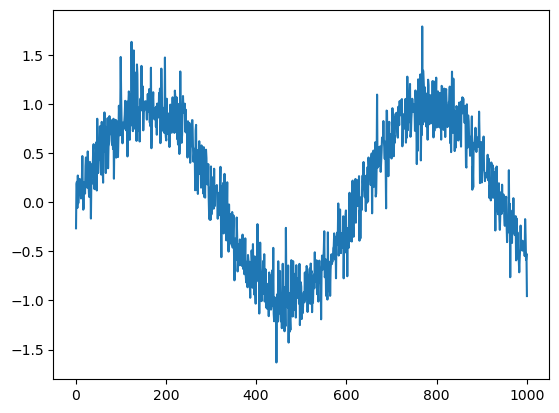

In [2]:
T=1000
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.sin(0.01 * time) + torch.normal(0,0.2,(T,))
plt.plot(time, x)


In [3]:
tau=4
features=torch.zeros((T-tau,tau))
for i in range(tau):
    features[:,i]=x[i:T-tau+i]
labels=x[tau:].reshape((-1,1))

batch_size,n_train=16,600
train_iter=utils.load_array((features[:n_train],labels[:n_train]),batch_size,is_train=True)


In [4]:
def init_weight(m):
    if type(m)==nn.Linear:
        nn.init.xavier_uniform_(m.weight)

def get_Net():
    net=nn.Sequential(nn.Linear(4,10),nn.ReLU(),nn.Linear(10,1))
    net.apply(init_weight)
    return net

loss=nn.MSELoss()

    

In [ ]:
def train(net,train_iter,loss,epochs,lr):
    trainer=torch.optim.Adam(net.parameters(),lr)
    for epoch in range(epochs):
        for X,y in train_iter:
            trainer.zero_grad()
            l=loss(net(X),y)
            l.backward()
            trainer.step()
        print(f'epoch {epoch+1},'
            f'loss:{utils.evaluate_accuracy_gpu}')
            